In [25]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [26]:
df=pd.read_excel(r"C:\Users\kpasw\OneDrive\Desktop\Data sets\Hotel_booking.xlsx")
df

,Hotel,IsCanceled,LeadTime,ArrivalDateWeekNumber,Arrival Date,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,TotalGuests,StayDuration,BookingStatus
0,Resort Hotel,0,7,27,42186,0,1,1,0.0,0,...,0,Transient,75.00,0,0,Check-Out,42187,1.0,1,Confirmed
1,Resort Hotel,0,13,27,42186,0,1,1,0.0,0,...,0,Transient,75.00,0,0,Check-Out,42187,1.0,1,Confirmed
2,Resort Hotel,0,14,27,42186,0,2,2,0.0,0,...,0,Transient,98.00,0,1,Check-Out,42188,2.0,2,Confirmed
3,Resort Hotel,0,0,27,42186,0,2,2,0.0,0,...,0,Transient,107.00,0,0,Check-Out,42188,2.0,2,Confirmed
4,Resort Hotel,0,9,27,42186,0,2,2,0.0,0,...,0,Transient,103.00,0,1,Check-Out,42188,2.0,2,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53045,City Hotel,0,188,35,42978,2,3,2,0.0,0,...,0,Transient,99.00,0,0,Check-Out,42983,2.0,5,Confirmed
53046,City Hotel,0,164,35,42978,2,4,2,0.0,0,...,0,Transient,87.60,0,0,Check-Out,42984,2.0,6,Confirmed
53047,City Hotel,0,21,35,42977,2,5,2,0.0,0,...,0,Transient,96.14,0,2,Check-Out,42984,2.0,7,Confirmed
53048,City Hotel,0,102,35,42978,2,5,3,0.0,0,...,0,Transient,225.43,0,2,Check-Out,42985,3.0,7,Confirmed


In [27]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateWeekNumber,Arrival Date,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,...,BookingChanges,Agent,Company,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatusDate,TotalGuests,StayDuration
count,53050.000000,53050.000000,53050.000000,53050.000000,53050.000000,53050.000000,53050.000000,53049.000000,53050.000000,53050.000000,...,53050.000000,47758.000000,2270.000000,53050.000000,53050.000000,53050.000000,53050.000000,53050.000000,53049.000000,53050.000000
mean,0.368256,87.381640,27.105485,42644.064204,1.071932,2.775325,1.933666,0.157835,0.011291,0.034496,...,0.223657,95.170631,167.812775,0.398021,111.629652,0.079472,0.727559,42623.009199,2.102792,3.847257
std,0.482336,82.912399,13.243231,218.161410,1.061472,2.142016,0.661618,0.488316,0.120183,0.182500,...,0.658272,112.485154,132.683965,6.975719,57.293026,0.273733,0.837438,215.698539,0.834933,2.883812
min,0.000000,0.000000,1.000000,42186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,41929.000000,0.000000,1.000000
25%,0.000000,20.000000,17.000000,42485.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,9.000000,45.000000,0.000000,75.892500,0.000000,0.000000,42462.000000,2.000000,2.000000
50%,0.000000,62.000000,28.000000,42648.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,12.000000,150.000000,0.000000,103.000000,0.000000,1.000000,42628.000000,2.000000,3.000000
75%,1.000000,135.000000,36.000000,42842.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,240.000000,251.000000,0.000000,139.500000,0.000000,1.000000,42807.000000,2.000000,5.000000
max,1.000000,709.000000,53.000000,42978.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,...,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,42992.000000,55.000000,69.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53050 entries, 0 to 53049
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hotel                        53050 non-null  object 
 1   IsCanceled                   53050 non-null  int64  
 2   LeadTime                     53050 non-null  int64  
 3   ArrivalDateWeekNumber        53050 non-null  int64  
 4   Arrival Date                 53050 non-null  int64  
 5   StaysInWeekendNights         53050 non-null  int64  
 6   StaysInWeekNights            53050 non-null  int64  
 7   Adults                       53050 non-null  int64  
 8   Children                     53049 non-null  float64
 9   Babies                       53050 non-null  int64  
 10  Meal                         53050 non-null  object 
 11  Country                      52741 non-null  object 
 12  MarketSegment                53050 non-null  object 
 13  DistributionChan

In [29]:
df.isna().sum()

Hotel                              0
IsCanceled                         0
LeadTime                           0
ArrivalDateWeekNumber              0
Arrival Date                       0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           1
Babies                             0
Meal                               0
Country                          309
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                           5292
Company                        50780
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
RequiredCarParkingSpaces           0
T

In [30]:
df.isna().mean()*100

Hotel                           0.000000
IsCanceled                      0.000000
LeadTime                        0.000000
ArrivalDateWeekNumber           0.000000
Arrival Date                    0.000000
StaysInWeekendNights            0.000000
StaysInWeekNights               0.000000
Adults                          0.000000
Children                        0.001885
Babies                          0.000000
Meal                            0.000000
Country                         0.582469
MarketSegment                   0.000000
DistributionChannel             0.000000
IsRepeatedGuest                 0.000000
PreviousCancellations           0.000000
PreviousBookingsNotCanceled     0.000000
ReservedRoomType                0.000000
AssignedRoomType                0.000000
BookingChanges                  0.000000
DepositType                     0.000000
Agent                           9.975495
Company                        95.721018
DaysInWaitingList               0.000000
CustomerType    

In [31]:
#df.drop(["Company"], axis=1, inplace=True)



In [32]:
df.isna().sum()

Hotel                              0
IsCanceled                         0
LeadTime                           0
ArrivalDateWeekNumber              0
Arrival Date                       0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           1
Babies                             0
Meal                               0
Country                          309
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                           5292
Company                        50780
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
RequiredCarParkingSpaces           0
T

In [33]:
df["Agent"].fillna(df["Agent"].median(),inplace=True)


In [34]:
df["Country"].fillna(df["Country"].mode()[0],inplace=True)


In [35]:
df.dropna(inplace=True)


In [36]:
df.isna().sum()

Hotel                          0
IsCanceled                     0
LeadTime                       0
ArrivalDateWeekNumber          0
Arrival Date                   0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
TotalGuest

<Axes: >

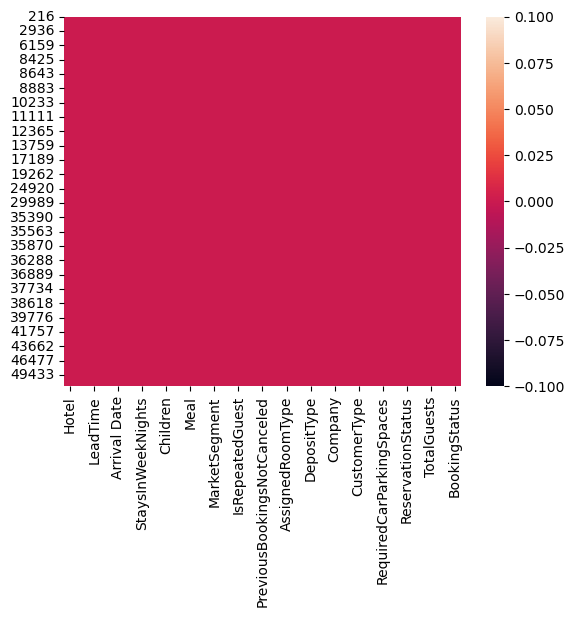

In [37]:
sns.heatmap(df.isna())

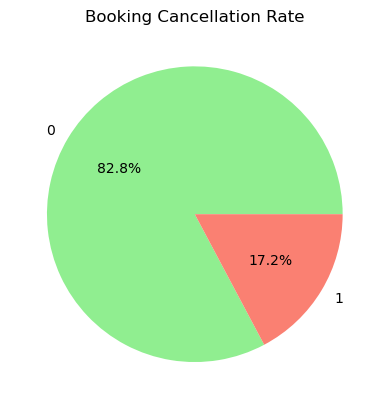

In [38]:
plt.figure()
df['IsCanceled'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['lightgreen','salmon']
)
plt.title('Booking Cancellation Rate')
plt.ylabel('')
plt.show()


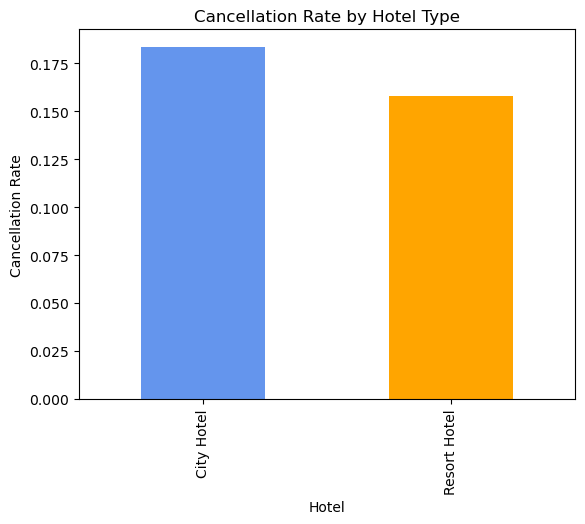

In [39]:
plt.figure()
df.groupby('Hotel')['IsCanceled'].mean().plot.bar(
    color=['cornflowerblue','orange']
)
plt.title('Cancellation Rate by Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()


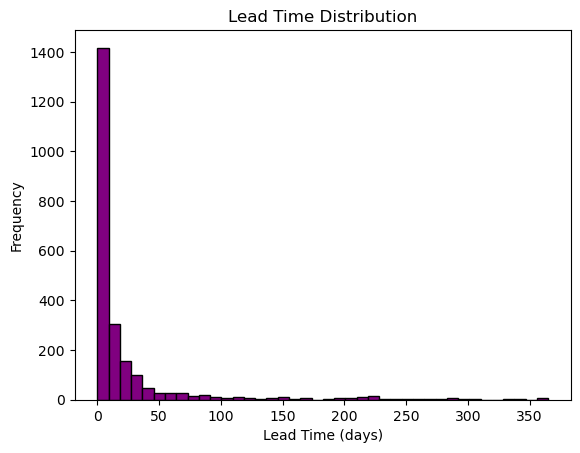

In [40]:
plt.figure()
plt.hist(df['LeadTime'], bins=40, color='purple', edgecolor='black')
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


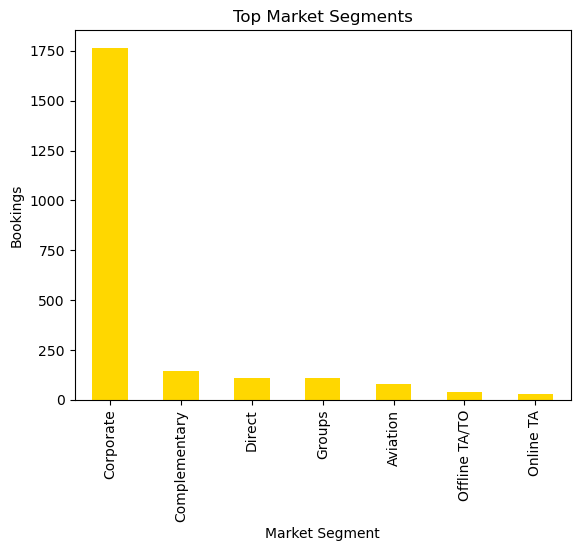

In [41]:
plt.figure()
df['MarketSegment'].value_counts().head(10).plot.bar(color='gold')
plt.title('Top Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Bookings')
plt.show()


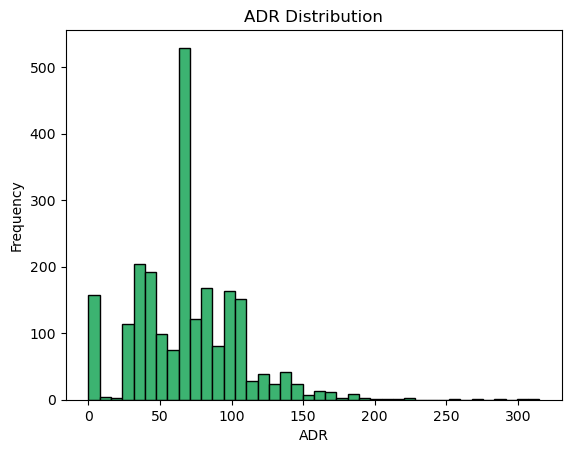

In [42]:
plt.figure()
plt.hist(df['ADR'], bins=40, color='mediumseagreen', edgecolor='black')
plt.title('ADR Distribution')
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.show()


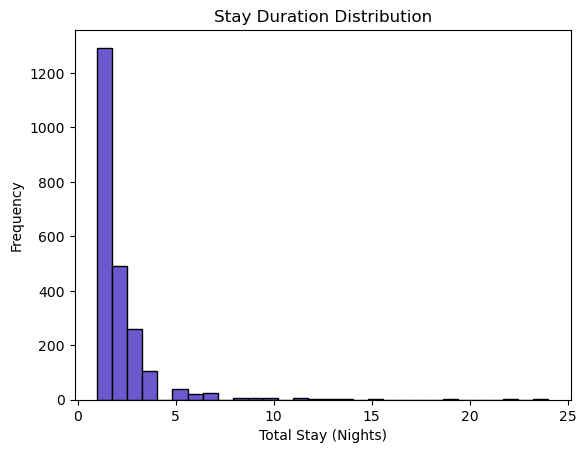

In [43]:
plt.figure()
plt.hist(df['StayDuration'], bins=30, color='slateblue', edgecolor='black')
plt.title('Stay Duration Distribution')
plt.xlabel('Total Stay (Nights)')
plt.ylabel('Frequency')
plt.show()


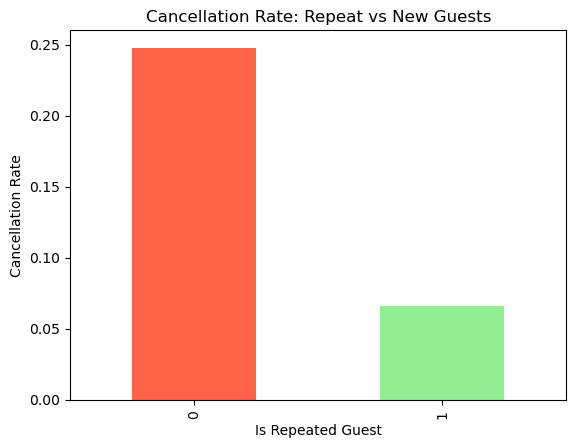

In [44]:
plt.figure()
df.groupby('IsRepeatedGuest')['IsCanceled'].mean().plot.bar(
    color=['tomato','lightgreen']
)
plt.title('Cancellation Rate: Repeat vs New Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Cancellation Rate')
plt.show()


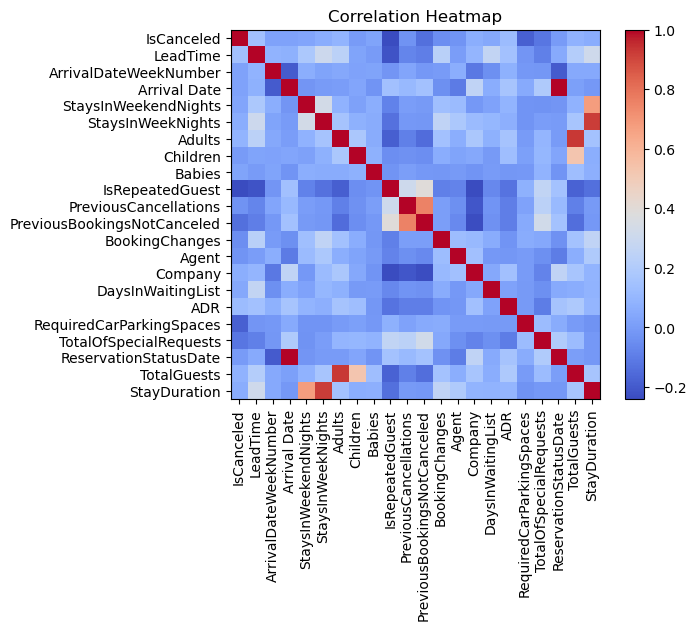

In [45]:
plt.figure()
corr = df.select_dtypes(include=['int64','float64']).corr()
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()


In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2270 entries, 216 to 52960
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hotel                        2270 non-null   object 
 1   IsCanceled                   2270 non-null   int64  
 2   LeadTime                     2270 non-null   int64  
 3   ArrivalDateWeekNumber        2270 non-null   int64  
 4   Arrival Date                 2270 non-null   int64  
 5   StaysInWeekendNights         2270 non-null   int64  
 6   StaysInWeekNights            2270 non-null   int64  
 7   Adults                       2270 non-null   int64  
 8   Children                     2270 non-null   float64
 9   Babies                       2270 non-null   int64  
 10  Meal                         2270 non-null   object 
 11  Country                      2270 non-null   object 
 12  MarketSegment                2270 non-null   object 
 13  DistributionChannel 

In [48]:
label=LabelEncoder()
cat_cols=['Hotel','Meal','Country','MarketSegment','DistributionChannel','ReservedRoomType','AssignedRoomType','DepositType','CustomerType','ReservationStatus']
for col in cat_cols:
    df[col]=df[col].astype(str)
    df[col]=label.fit_transform(df[col])

In [49]:
label=LabelEncoder()
cat_cols=['Hotel','Meal','Country','MarketSegment','MarketSegment','DistributionChannel','ReservedRoomType','AssignedRoomType','DepositType','CustomerType','ReservationStatus']
for col in cat_cols:
    df[col]=df[col].astype(str)
    df[col]=label.fit_transform(df[col])

In [50]:
x= df.drop(columns=['BookingStatus'])
y=df['BookingStatus']

In [51]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [53]:
gnb= GaussianNB()
gnb

GaussianNB()

In [54]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Canceled       1.00      1.00      1.00        79
   Confirmed       1.00      1.00      1.00       375

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454



# Grid Search

In [56]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}


In [57]:
grid = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy')

In [58]:
print("Best parameters:", grid.best_params_)

best_nb = grid.best_estimator_
print("Test accuracy:", best_nb.score(x_test, y_test))


Best parameters: {'var_smoothing': 1e-09}
Test accuracy: 1.0


In [60]:
acc=accuracy_score(y_test,y_pred)
acc

1.0